In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/kshitijaBasarge/IBM_DataScience_Assignments/main/kc_house_data_Nan.csv"
df = pd.read_csv('kc_house_data_NAN.csv')
df = df.dropna()

print("Q1 - Data Types of each column:")
print(df.dtypes)

Q1 - Data Types of each column:
id                 int64
Unnamed: 0         int64
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [3]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

print("\nQ2 - Statistical Summary after dropping columns:")
print(df.describe())


Q2 - Statistical Summary after dropping columns:
              price   bedrooms  bathrooms  sqft_living      sqft_lot  \
count  3.500000e+01  35.000000  35.000000    35.000000     35.000000   
mean   5.568838e+05   2.942857   2.657143  2340.342857  10710.000000   
std    3.416895e+05   1.327157   0.850704  1053.746005   5776.615593   
min    1.160900e+05   1.000000   1.000000   595.000000   1663.000000   
25%    2.409665e+05   2.000000   2.000000  1445.000000   5242.500000   
50%    4.062360e+05   3.000000   2.800000  2319.000000  11173.000000   
75%    8.346905e+05   4.000000   3.300000  3293.000000  15243.000000   
max    1.188396e+06   5.000000   3.900000  3978.000000  19237.000000   

          floors  waterfront       view  condition      grade   sqft_above  \
count  35.000000   35.000000  35.000000  35.000000  35.000000    35.000000   
mean    1.600000    0.542857   1.685714   2.571429   5.857143  1908.942857   
std     0.416569    0.505433   1.367080   1.144956   3.448298   925

In [8]:
print("\nQ3 - Number of houses per floor type:")
# Count unique floor values and convert to DataFrame
pisos = df['floors'].value_counts().to_frame()
pisos


Q3 - Number of houses per floor type:


,count
floors,
2.0,16
1.5,10
1.0,9



Q4 - Boxplot for waterfront vs price


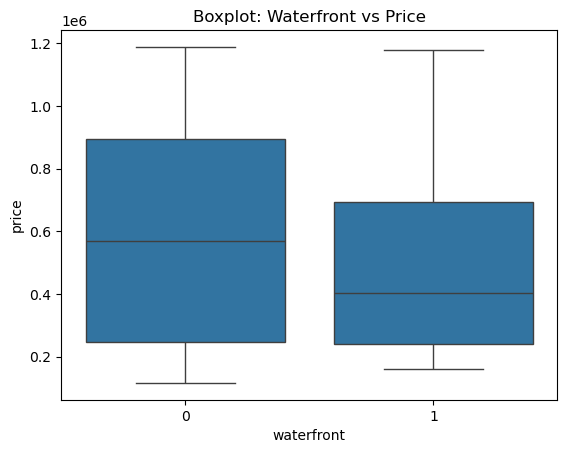

In [5]:
print("\nQ4 - Boxplot for waterfront vs price")
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Boxplot: Waterfront vs Price")
plt.show()


Q5 - Regplot for sqft_above vs price


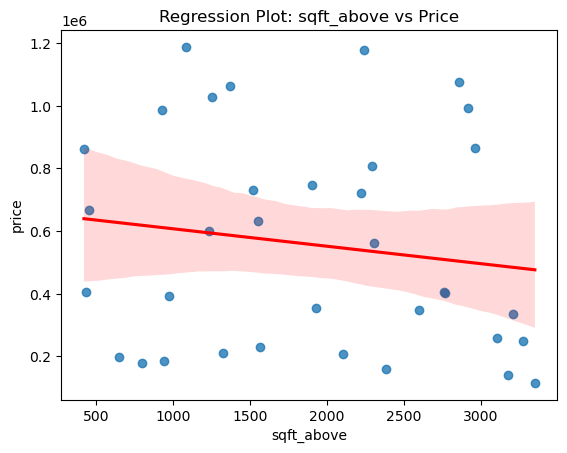

In [7]:
print("\nQ5 - Regplot for sqft_above vs price")
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})
plt.title("Regression Plot: sqft_above vs Price")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

X = df[["sqft_living"]]
y = df["price"]

lm = LinearRegression()
lm.fit(X, y)

r2_sqft = lm.score(X, y)
print("\nQ6 - R^2 using sqft_living:", r2_sqft)


Q6 - R^2 using sqft_living: 1.199631416493041e-05


In [10]:
features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X_multi = df[features]
y_multi = df["price"]

lm2 = LinearRegression()
lm2.fit(X_multi, y_multi)

r2_multi = lm2.score(X_multi, y_multi)
print("\nQ7 - R^2 with multiple features:", r2_multi)


Q7 - R^2 with multiple features: 0.407407267966021


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

print("\nQ8 - Pipeline with Polynomial Features + Linear Regression")

features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X_pipe = df[features]
y_pipe = df["price"]

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

pipe.fit(X_pipe, y_pipe)
r2_pipe = pipe.score(X_pipe, y_pipe)
print("R^2 with pipeline:", r2_pipe)


Q8 - Pipeline with Polynomial Features + Linear Regression
R^2 with pipeline: 1.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

print("\nQ9 - Ridge Regression (alpha=0.1)")

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

r2_ridge = ridge.score(X_test, y_test)
print("R^2 with Ridge Regression:", r2_ridge)


Q9 - Ridge Regression (alpha=0.1)
R^2 with Ridge Regression: -1.081960219194717


In [14]:
print("\nQ10 - Polynomial Ridge Regression (degree=2, alpha=0.1)")

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

r2_ridge_poly = ridge_poly.score(X_test_poly, y_test)
print("R^2 with Polynomial Ridge Regression:", r2_ridge_poly)


Q10 - Polynomial Ridge Regression (degree=2, alpha=0.1)
R^2 with Polynomial Ridge Regression: -12.476050363734695


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.92676e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
